# Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.metrics import mean_squared_error as rmse, r2_score, accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import cross_val_predict as cp
from sklearn.linear_model import LinearRegression, LogisticRegression  
from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedKFold, learning_curve, ShuffleSplit,validation_curve
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import eli5
from eli5.sklearn import PermutationImportance
import random
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
random.seed(139)

/Users/patriciaattah/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/patriciaattah/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv("heart.csv")
df.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [3]:
#rename column headers
df.columns = ['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df.head(6)

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [4]:
df = pd.get_dummies(df, columns=['sex'], drop_first=True)
df.dtypes

age                          int64
chest_pain                   int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
sex_1                        uint8
dtype: object

In [5]:
x = df.drop(columns = 'target')
y = df.target

# Train test split 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], test_size = .2, random_state=10)
scaler = ss()
scaler.fit(X_train)

Xu_train = X_train
Xu_test = X_test

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
accuracy = []
precision = []
model = []

In [7]:
cv_train = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

# KNN Classifier 

In [8]:
random.seed(500)
classifier = knn(n_neighbors=5)
classifier.fit(X_train, y_train)
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy = ', round(accuracy_score(y_test, y_pred),5))
accuracy.append(round(accuracy_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
model.append('KNN')

[[29  6]
 [ 3 23]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        35
           1       0.79      0.88      0.84        26

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

Accuracy =  0.85246


# Naive Bayes Classifier

In [9]:
random.seed(580)
classifier1 = GaussianNB()
classifier1.fit(X_train, y_train)
all_accuracies = cross_val_score(estimator=classifier1, X=X_train, y=y_train, cv=5)
y_pred = classifier1.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy = ', round(accuracy_score(y_test, y_pred),5))
accuracy.append(round(accuracy_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
model.append('Naive Bayes')

[[28  7]
 [ 6 20]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        35
           1       0.74      0.77      0.75        26

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61

Accuracy =  0.78689


# Logistic Regression Classifier

In [10]:
random.seed(500)
classifier2 = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
classifier2.fit(X_train, y_train);
y_pred = classifier2.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy = ', round(accuracy_score(y_test, y_pred),5))
accuracy.append(round(accuracy_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
model.append('Logistic Regression')

[[26  9]
 [ 4 22]]
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        35
           1       0.71      0.85      0.77        26

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61

Accuracy =  0.78689


# Svm Classifier

In [11]:
random.seed(500)
classifier3 = svm.SVC(kernel='linear')
classifier3.fit(X_train, y_train);
y_pred = classifier3.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy = ', round(accuracy_score(y_test, y_pred),5))
accuracy.append(round(accuracy_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
model.append('Svm')

[[25 10]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        35
           1       0.68      0.81      0.74        26

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.77      0.75      0.76        61

Accuracy =  0.7541


# Decision Tree Classifier

In [12]:
random.seed(500)
classifier4 = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5)
classifier4.fit(X_train, y_train);
all_accuracies = cross_val_score(estimator=classifier4, X=X_train, y=y_train, cv=5)
y_pred = classifier4.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))  
print('Accuracy = ', round(accuracy_score(y_test, y_pred),4))
accuracy.append(round(accuracy_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
model.append('Decision Tree')

[[22 13]
 [ 3 23]]
              precision    recall  f1-score   support

           0       0.88      0.63      0.73        35
           1       0.64      0.88      0.74        26

    accuracy                           0.74        61
   macro avg       0.76      0.76      0.74        61
weighted avg       0.78      0.74      0.74        61

Accuracy =  0.7377


# Random forest Classifier

In [13]:
random.seed(500)
classifier5 = RandomForestClassifier(n_estimators=13, random_state = 100)
classifier5.fit(Xu_train, y_train);
all_accuracies = cross_val_score(estimator=classifier5, X=X_train, y=y_train, cv=5)
y_pred = classifier5.predict(Xu_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
print('Accuracy = ', round(accuracy_score(y_test, y_pred),5))
accuracy.append(round(accuracy_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
model.append('Random forest')

[[27  8]
 [ 4 22]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        35
           1       0.73      0.85      0.79        26

    accuracy                           0.80        61
   macro avg       0.80      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

Accuracy =  0.80328


# Gradient Boost

In [14]:
random.seed(500)
classifier6 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
classifier6.fit(X_train, y_train);
y_pred = classifier6.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy = ', round(accuracy_score(y_test, y_pred),5))
accuracy.append(round(accuracy_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
model.append('Gradient Boost')

[[27  8]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.81        35
           1       0.72      0.81      0.76        26

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61

Accuracy =  0.78689


# Bagging Classifier

In [15]:
random.seed(500)
classifier7 = BaggingClassifier()
classifier7.fit(X_train, y_train);
y_pred = classifier7.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
print('Accuracy = ', round(accuracy_score(y_test, y_pred),5))
accuracy.append(round(accuracy_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
model.append('Bagging')

[[27  8]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.81        35
           1       0.72      0.81      0.76        26

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61

Accuracy =  0.78689


# Accuracy Table

In [16]:
Best_model = pd.DataFrame()
Best_model['Model'] = model
Best_model['Accuracy'] = accuracy
Best_model['Precision'] = precision

BM_acc = Best_model.sort_values(by=['Accuracy'], ascending=False)
BM_acc

,Model,Accuracy,Precision
0,KNN,0.85246,0.79310
5,Random forest,0.80328,0.73333
1,Naive Bayes,0.78689,0.74074
2,Logistic Regression,0.78689,0.70968
6,Gradient Boost,0.78689,0.72414
7,Bagging,0.78689,0.72414
3,Svm,0.75410,0.67742
4,Decision Tree,0.73770,0.63889


In [17]:
BM_pre = Best_model.sort_values(by=['Precision'], ascending=False)

# Models by Precision

Text(0, 0.5, 'Precision')

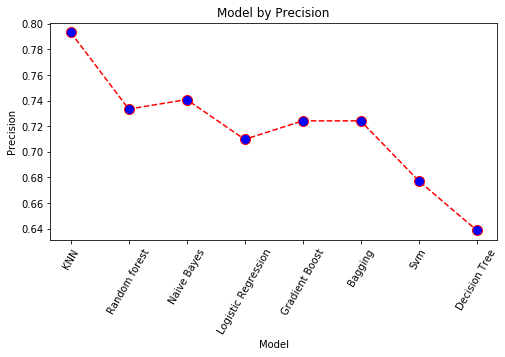

In [18]:
plt.figure(figsize=(8, 4))
plt.plot(BM_acc['Model'], BM_acc['Precision'], color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Model by Precision')
plt.xticks(rotation=60)
plt.xlabel('Model')
plt.ylabel('Precision')

# Models by Accuracy

Text(0, 0.5, 'Accuracy')

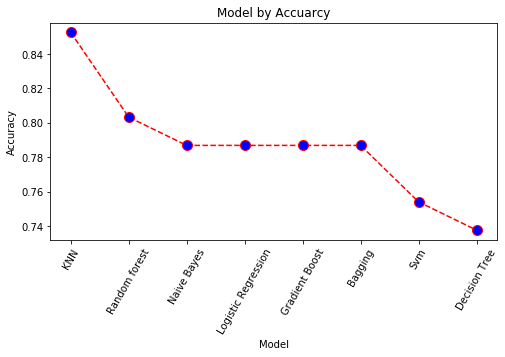

In [19]:
plt.figure(figsize=(8, 4))
plt.plot(BM_acc['Model'], BM_acc['Accuracy'], color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Model by Accuarcy')
plt.xticks(rotation=60)
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Permutation Importance for Knn 

In [20]:
perm = PermutationImportance(classifier, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = x.columns.tolist())

Weight,Feature
0.0689 ± 0.0700,num_major_vessels
0.0656 ± 0.0508,thalassemia
0.0590 ± 0.0334,st_depression
0.0557 ± 0.0445,sex_1
0.0557 ± 0.0393,chest_pain
0.0459 ± 0.0382,max_heart_rate_achieved
0.0393 ± 0.0491,age
0.0295 ± 0.0382,rest_ecg
0.0262 ± 0.0161,cholesterol
0.0230 ± 0.0334,resting_blood_pressure


# Permutation Importance for Random forest

In [21]:
perm = PermutationImportance(classifier5, random_state=100).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = x.columns.tolist())

Weight,Feature
0.0885 ± 0.0572,st_depression
0.0361 ± 0.0382,exercise_induced_angina
0.0164 ± 0.0359,chest_pain
0 ± 0.0000,thalassemia
0 ± 0.0000,st_slope
0 ± 0.0000,max_heart_rate_achieved
0 ± 0.0000,cholesterol
0 ± 0.0000,resting_blood_pressure
0 ± 0.0000,age
-0.0033 ± 0.0382,sex_1


# Foward selesction for knn

In [26]:
sfs1 = SFS(knn(n_neighbors=6),
          k_features=13,
          forward=True,
          scoring='accuracy',
          cv=0)
sfs1.fit(x,y)
sfs1.subsets_

{1: {'feature_idx': (10,),
  'cv_scores': array([0.74587459]),
  'avg_score': 0.7458745874587459,
  'feature_names': ('num_major_vessels',)},
 2: {'feature_idx': (6, 10),
  'cv_scores': array([0.79537954]),
  'avg_score': 0.7953795379537953,
  'feature_names': ('max_heart_rate_achieved', 'num_major_vessels')},
 3: {'feature_idx': (6, 8, 10),
  'cv_scores': array([0.81848185]),
  'avg_score': 0.8184818481848185,
  'feature_names': ('max_heart_rate_achieved',
   'st_depression',
   'num_major_vessels')},
 4: {'feature_idx': (6, 8, 10, 11),
  'cv_scores': array([0.8349835]),
  'avg_score': 0.834983498349835,
  'feature_names': ('max_heart_rate_achieved',
   'st_depression',
   'num_major_vessels',
   'thalassemia')},
 5: {'feature_idx': (4, 6, 8, 10, 11),
  'cv_scores': array([0.83168317]),
  'avg_score': 0.8316831683168316,
  'feature_names': ('fasting_blood_sugar',
   'max_heart_rate_achieved',
   'st_depression',
   'num_major_vessels',
   'thalassemia')},
 6: {'feature_idx': (4, 6, 8,

In [27]:
knn_mod = df[['sex_1','chest_pain','fasting_blood_sugar','st_slope','num_major_vessels','thalassemia','st_depression','target']]

In [28]:
XR_train, XR_test, yr_train, yr_test = train_test_split(knn_mod.drop('target', 1), knn_mod['target'], test_size = .2, random_state=10)
scaler = ss()
scaler.fit(XR_train)

XR_train = scaler.transform(XR_train)
XR_test = scaler.transform(XR_test)

# Foward Selection results

In [29]:
classifier = knn(n_neighbors=5)
classifier.fit(XR_train, yr_train);
yr_pred = classifier.predict(XR_test)
print(confusion_matrix(yr_test, yr_pred))
print(classification_report(yr_test, yr_pred)) 
print('Accuracy = ', round(accuracy_score(yr_test, yr_pred),5))

[[27  8]
 [ 4 22]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        35
           1       0.73      0.85      0.79        26

    accuracy                           0.80        61
   macro avg       0.80      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

Accuracy =  0.80328


# knn foward selection correlation table

In [30]:
knn_mod.corr()

,sex_1,chest_pain,fasting_blood_sugar,st_slope,num_major_vessels,thalassemia,st_depression,target
sex_1,1.000000,-0.049353,0.045032,-0.030711,0.118261,0.210041,0.096093,-0.280937
chest_pain,-0.049353,1.000000,0.094444,0.119717,-0.181053,-0.161736,-0.149230,0.433798
fasting_blood_sugar,0.045032,0.094444,1.000000,-0.059894,0.137979,-0.032019,0.005747,-0.028046
st_slope,-0.030711,0.119717,-0.059894,1.000000,-0.080155,-0.104764,-0.577537,0.345877
num_major_vessels,0.118261,-0.181053,0.137979,-0.080155,1.000000,0.151832,0.222682,-0.391724
thalassemia,0.210041,-0.161736,-0.032019,-0.104764,0.151832,1.000000,0.210244,-0.344029
st_depression,0.096093,-0.149230,0.005747,-0.577537,0.222682,0.210244,1.000000,-0.430696
target,-0.280937,0.433798,-0.028046,0.345877,-0.391724,-0.344029,-0.430696,1.000000


# Foward selection Random forest

In [31]:
sfs1 = SFS(RandomForestClassifier(n_estimators=13, random_state = 100),
          k_features=13,
          forward=True,
          scoring='accuracy',
          cv=3)
sfs1.fit(x,y)
sfs1.subsets_

{1: {'feature_idx': (11,),
  'cv_scores': array([0.81188119, 0.75247525, 0.72277228]),
  'avg_score': 0.7623762376237625,
  'feature_names': ('thalassemia',)},
 2: {'feature_idx': (10, 11),
  'cv_scores': array([0.84158416, 0.76237624, 0.73267327]),
  'avg_score': 0.778877887788779,
  'feature_names': ('num_major_vessels', 'thalassemia')},
 3: {'feature_idx': (9, 10, 11),
  'cv_scores': array([0.86138614, 0.82178218, 0.75247525]),
  'avg_score': 0.8118811881188118,
  'feature_names': ('st_slope', 'num_major_vessels', 'thalassemia')},
 4: {'feature_idx': (1, 9, 10, 11),
  'cv_scores': array([0.87128713, 0.81188119, 0.78217822]),
  'avg_score': 0.821782178217822,
  'feature_names': ('chest_pain',
   'st_slope',
   'num_major_vessels',
   'thalassemia')},
 5: {'feature_idx': (1, 4, 9, 10, 11),
  'cv_scores': array([0.88118812, 0.83168317, 0.78217822]),
  'avg_score': 0.8316831683168316,
  'feature_names': ('chest_pain',
   'fasting_blood_sugar',
   'st_slope',
   'num_major_vessels',
   '

In [32]:
RanFor_mod = df[['sex_1','cholesterol','chest_pain','fasting_blood_sugar','st_slope','num_major_vessels','thalassemia','rest_ecg','st_depression','target']]

In [33]:
XR_train, XR_test, yr_train, yr_test = train_test_split(RanFor_mod.drop('target', 1), RanFor_mod['target'], test_size = .2, random_state=10)
scaler = ss()
scaler.fit(XR_train)

XR_train = scaler.transform(XR_train)
XR_test = scaler.transform(XR_test)

## Foward Selection Results

In [34]:
random.seed(500)
classifier5 = RandomForestClassifier(n_estimators=10, random_state = 100)
classifier5.fit(XR_train, yr_train);
yr_pred = classifier5.predict(XR_test)
print(confusion_matrix(yr_test, yr_pred))
print(classification_report(yr_test, yr_pred)) 
print('Accuracy = ', round(accuracy_score(yr_test, yr_pred),5))

[[30  5]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        35
           1       0.81      0.81      0.81        26

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

Accuracy =  0.83607


# Filter Feature by Variation

In [35]:
df.var()

age                          82.484558
chest_pain                    1.065132
resting_blood_pressure      307.586453
cholesterol                2686.426748
fasting_blood_sugar           0.126877
rest_ecg                      0.276528
max_heart_rate_achieved     524.646406
exercise_induced_angina       0.220707
st_depression                 1.348095
st_slope                      0.379735
num_major_vessels             1.045724
thalassemia                   0.374883
target                        0.248836
sex_1                         0.217166
dtype: float64

There are no varaibles that have a variablity of less than 0.1 hence we will not use this method for selection.

# Feature Selection by Correlation

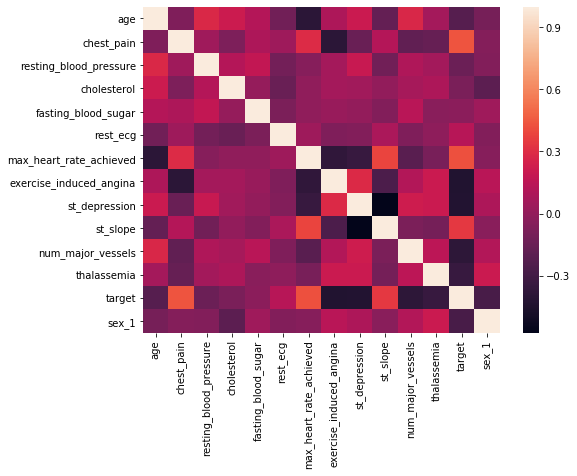

In [36]:
fig_dims = (8,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(), ax=ax)
plt.show()